In [99]:
import numpy as np
import pandas as pd
import scipy

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
chunksize = 320 #approximately 31685708 entries

df = pd.DataFrame()
curr_chunk = 0
data=pd.read_csv('all_skills_sorted.tsv', sep='\t', chunksize=chunksize)

for chunk in data:
    rand_person = chunk.sample(n=1)
    df = pd.concat([df, rand_person])
    
    # log progress
    curr_chunk += 1
    if curr_chunk % 10000 == 0:
        print(curr_chunk)

df.columns = ['subclass', 'skills']
# shuffle the rows in the data frame to prevent converging at a poor minimum
df = df.sample(frac=1)
df

10000
20000
30000
40000
50000
60000
70000
80000
90000


,subclass,skills
194674,"[('Accounting and Auditing', 0.467029519834799...","Supply Chain Management,Strategic Financial Pl..."
14453242,"[('Hospitality', 0.72345502580667376), ('Admin...","Event Management,Customer Service,E-strategy,H..."
8880416,"[('CRM and Sales Management', 0.35735270715895...","Higher Education Management,Executive Educatio..."
22954517,"[('Product Management', 0.4877430927842627), (...","Liderazgo,Servicio de atención al cliente,Vent..."
19583422,"[('Military', 0.90122690374496017), ('Administ...","Security Clearance,Military Operations,Militar..."
6579652,"[('Business Development', 0.6579389997787064),...","Internet Explorer,Microsoft Office,Lingua ingl..."
5259294,"[('Business Development', 0.44338898590880077)...","Interpreting,Project Management,Language Servi..."
22279147,"[('Pharmaceutical', 0.47324753516310225), ('Sa...","Veterinary Medicine,Pharmaceutical Sales,Veter..."
15746313,"[('Human Resources (Senior)', 0.83648240501873...","Change Management,Stakeholder Engagement,Team ..."
30750178,"[('Web Development', 0.34938176800720083), ('M...","Microsoft Office,PowerPoint,Web Design,Leaders..."


In [101]:
# print initial distribution
counts = {}
for subclass in df['subclass']:
    if isinstance(subclass, str):
        curr = subclass.split(',')[0]
    else:
        continue
    if curr in counts:
        counts[curr] += 1
    else:
        counts[curr] = 1
for subset, count in counts.items():
    print((subset, count))

("[('Accounting and Auditing'", 2795)
("[('Hospitality'", 1666)
("[('CRM and Sales Management'", 1274)
("[('Product Management'", 1711)
("[('Military'", 1512)
("[('Business Development'", 12443)
("[('Pharmaceutical'", 1945)
("[('Human Resources (Senior)'", 1302)
("[('Web Development'", 3136)
("[('Administration'", 7467)
("[('Logistics'", 1652)
("[('Data Analysis'", 1426)
("[('Technical Product Management'", 1945)
("[('Graphic Design'", 1986)
("[('Education'", 1959)
("[('Recruiting'", 2164)
("[('Sales'", 2106)
("[('Legal'", 1427)
("[('Web Design'", 1366)
("[('Digital Marketing'", 2329)
("[('Industrial Management'", 703)
("[('Construction Management'", 2176)
("[('Energy", 2383)
("[('Software Engineering'", 1849)
("[('Non-Profit and Community'", 2353)
("[('Middle Management'", 1933)
("[('Electrical Engineering'", 2169)
("[('Visual Design'", 1523)
("[('Retail and Fashion'", 1857)
("[('Banking and Finance'", 2621)
("[('Sales Management'", 2584)
("[('IT Management and Support'", 2155)
("[('I

In [102]:
corpus = []
for skills in df['skills']:
    corpus.append(skills)
print(str(len(corpus)) + ' sampled people')

99018 sampled people


In [103]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), min_df=10) #drop sparse entries < 10 in corpus
data_vectorized = normalize(vectorizer.fit_transform(corpus))

# convert sparse matrix to full
data_processed = data_vectorized.toarray()
print(data_processed.shape)

/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


(99018, 10105)


In [105]:
def calc_lda(num_topics):
    lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=500) #change max_iter to 500
    lda_output = lda.fit_transform(data_processed)
    print(num_topics)
    print(lda)
    print(lda_output.shape)
    print(lda.components_.shape)
    return lda

In [109]:
# higher the better
def calc_score(lda_model, data):
    return lda_model.score(data)

# lower the better
def calc_perplexity(lda_model, data):
    return lda_model.perplexity(data)

In [118]:
def calc_avg_kl_divergence(lda_components):
    diverge = 0
    count = 0
    for i in range(len(lda_components)):
        for j in range(i+1, len(lda_components)):
            count += 1
            diverge += scipy.stats.entropy(lda_components[i], lda_components[j])
    return diverge / count

In [111]:
# run grid search over topics
n_topics = [25, 30, 35, 40, 45, 50]
score = []
perplexity = []
avg_kl = []
iteration = 1
for t in n_topics:
    print('Iteration ' + str(iteration))
    lda_model = calc_lda(t)
    score.append(calc_score(lda_model, data_vectorized))
    perplexity.append(calc_perplexity(lda_model, data_vectorized))
    avg_kl.append(calc_avg_kl_divergence(lda_model.components_))
    print(score)
    print(perplexity)
    print(avg_kl)
    iteration += 1

Iteration 1


/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


25
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=25, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 25)
(25, 10105)
[-8701959.390146539]
[3529222989.144811]
[6.742408457009379]
Iteration 2


/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


30
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=30, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 30)
(30, 10105)
[-8701959.390146539, -9927339.313993918]
[3529222989.144811, 78010014294.69225]
[6.742408457009379, 6.8312190934763235]
Iteration 3


/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


35
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=35, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 35)
(35, 10105)
[-8701959.390146539, -9927339.313993918, -11220182.77540056]
[3529222989.144811, 78010014294.69225, 2044757219685.59]
[6.742408457009379, 6.8312190934763235, 7.054921312069859]
Iteration 4


/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


40
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=40, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 40)
(40, 10105)
[-8701959.390146539, -9927339.313993918, -11220182.77540056, -12484946.099684224]
[3529222989.144811, 78010014294.69225, 2044757219685.59, 49925678299799.96]
[6.742408457009379, 6.8312190934763235, 7.054921312069859, 7.042767263500563]
Iteration 5


/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


45
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=45, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 45)
(45, 10105)


IndexError: index 44 is out of bounds for axis 0 with size 44

In [119]:
print(calc_avg_kl_divergence(lda_model.components_))

6.9685771767389975


In [120]:
# run grid search over topics
n_topics = [50]
score = []
perplexity = []
avg_kl = []
iteration = 1
for t in n_topics:
    print('Iteration ' + str(iteration))
    lda_model = calc_lda(t)
    score.append(calc_score(lda_model, data_vectorized))
    perplexity.append(calc_perplexity(lda_model, data_vectorized))
    avg_kl.append(calc_avg_kl_divergence(lda_model.components_))
    print(score)
    print(perplexity)
    print(avg_kl)
    iteration += 1

Iteration 1


/Users/ericgan/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


50
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=50, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 50)
(50, 10105)
[-14991015.750828782]
[2.8051216645700532e+16]
[6.903149401892693]


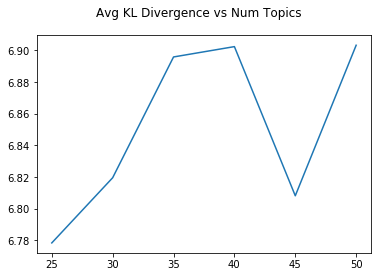

In [144]:
fig = plt.figure()
plt.plot([25, 30, 35, 40, 45, 50], [6.778362752391992, 6.819507269338511, 6.895753299133274, 6.9022818276055675, 6.808124234269176, 6.903149401892693])
fig.suptitle('Avg KL Divergence vs Num Topics')

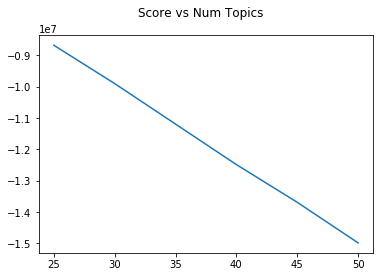

In [142]:
fig = plt.figure()
plt.plot([25, 30, 35, 40, 45, 50], [-8681162.87091844, -9904247.528604986, -11197575.216362337, -12490950.488927932, -13695221.17695717, -14991015.750828782])
fig.suptitle('Score vs Num Topics')

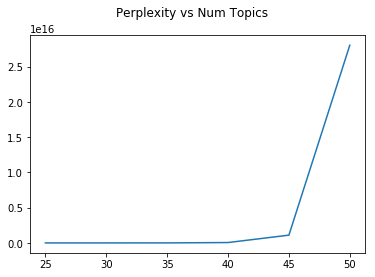

In [143]:
fig = plt.figure()
plt.plot([25, 30, 35, 40, 45, 50], [3428208186.1422534, 75588894496.52284, 1990678554124.7104, 52432014864612.18, 1102358327165857.5, 2.8051216645700532e+16 ])
fig.suptitle('Perplexity vs Num Topics')

In [ ]:
lda = LatentDirichletAllocation(n_topics=50, max_iter=500) #change max_iter to 500
lda_output = lda.fit_transform(data_processed)
print(num_topics)
print(lda)
print(lda_output.shape)
print(lda.components_.shape)

In [145]:
print(lda)
print(lda_output.shape)
print(lda.components_.shape)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_jobs=1, n_topics=50, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(99018, 50)
(50, 10105)


In [146]:
# column names
skillsets = ["Skill" + str(i) for i in range(lda.n_topics)]
# row names
people = ["Person" + str(i) for i in range(len(data_vectorized.toarray()))]

# create data frame relating people to each of the skillsets
df_people_skills = pd.DataFrame(np.round(lda_output, 2), columns=skillsets, index=people)

# Get dominant skill for each person
dominant_skill = np.argmax(df_people_skills.values, axis=1)
df_people_skills['Dominant Skill'] = dominant_skill

df_people_skills.head(15)

,Skill0,Skill1,Skill2,Skill3,Skill4,Skill5,Skill6,Skill7,Skill8,Skill9,...,Skill41,Skill42,Skill43,Skill44,Skill45,Skill46,Skill47,Skill48,Skill49,Dominant Skill
Person0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,10
Person1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.00,0.00,45
Person2,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,10
Person3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22
Person4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7
Person5,0.00,0.00,0.00,0.00,0.00,0.04,0.25,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31
Person6,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9
Person7,0.29,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
Person8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23
Person9,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35


In [147]:
df_skill_distribution = df_people_skills['Dominant Skill'].value_counts().reset_index(name='skill counts')
df_skill_distribution.columns = ['Skill Num', 'Num People']
df_skill_distribution

,Skill Num,Num People
0,35,17219
1,0,8717
2,7,5947
3,5,5839
4,10,5156
5,8,5074
6,4,4164
7,27,3430
8,31,3034
9,22,2969


<Container object of 50 artists>

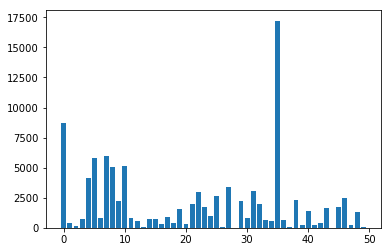

In [148]:
plt.bar(df_skill_distribution['Skill Num'], df_skill_distribution['Num People'])

In [138]:
# Topic-Keyword Matrix
df_skill_keywords = pd.DataFrame(lda.components_)
# Assign Column and Index
df_skill_keywords.columns = vectorizer.get_feature_names()
df_skill_keywords.index = skillsets

df_skill_keywords.head()

,.net,.net framework,10 key,1031 exchanges,21 cfr part 11,2d graphics,2g,35mm,360 feedback,3d,...,营销,营销战略,谈判,软件开发,销售管理,零售,项目管理,项目规划,顾客服务,领导力
Skill0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Skill1,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Skill2,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Skill3,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Skill4,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [139]:
# Show top k keywords for each skill
def show_topics(vectorizer, lda_model, k_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        # sort in descending order
        top_keyword_idx = (-topic_weights).argsort()[:k_words]
        topic_keywords.append(keywords.take(top_keyword_idx))
    return topic_keywords

In [140]:
# Topic - Keywords Dataframe
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda, k_words=15)
df_skill_keywords = pd.DataFrame(topic_keywords)
df_skill_keywords.columns = ['Word '+ str(i) for i in range(df_skill_keywords.shape[1])]
df_skill_keywords.index = ['Skill '+ str(i) for i in range(df_skill_keywords.shape[0])]
df_skill_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Skill 0,sales,new business development,sales management,management,business development,account management,strategic planning,marketing strategy,customer service,negotiation,business strategy,marketing,leadership,team building,strategy
Skill 1,sap,sap erp,sap r/3,mídias sociais,marketing,erp,sap implementation,trabalho em equipe,bpo,oratória,abap,marketing social,see 5+,recursos humanos,see less
Skill 2,supervisory skills,maritime,welding,marine engineering,maritime operations,inspection,see 12+,web content management,navigation,pressure vessels,shipbuilding,offshore operations,projektplanung,emerging markets,ingenieurwissenschaften
Skill 3,medical devices,pharmaceutical industry,clinical trials,oncology,pharmaceutical sales,healthcare,vehicles,product launch,automobile,automotive,clinical research,social skills,biotechnology,cardiology,sales effectiveness
Skill 4,engineering,manufacturing,continuous improvement,lean manufacturing,project management,energy,petroleum,project engineering,product development,six sigma,gas,commissioning,project planning,microsoft office,process engineering
Skill 5,social media,social media marketing,marketing,marketing communications,public relations,marketing strategy,advertising,event management,digital marketing,social networking,online advertising,online marketing,event planning,email marketing,management
Skill 6,microsoft office,management,assistenza clienti,project management,microsoft excel,lingua inglese,trattative,strategia di marketing,business plan,strategia d'impresa,microsoft word,pubbliche relazioni,vendite,ricerca,italian
Skill 7,public speaking,teaching,research,nonprofits,community outreach,leadership,fundraising,program development,event planning,curriculum development,curriculum design,microsoft office,program management,higher education,staff development
Skill 8,sql,requirements analysis,business analysis,software development,project management,agile methodologies,databases,integration,sdlc,oracle,software project management,business intelligence,microsoft sql server,testing,unix
Skill 9,photoshop,graphic design,illustrator,adobe creative suite,indesign,photography,web design,adobe photoshop,logo design,illustration,art direction,drawing,microsoft office,graphics,advertising


** Initial 44 Topics from above ** <br/>
("[('Accounting and Auditing'", 2795)
("[('Hospitality'", 1666)
("[('CRM and Sales Management'", 1274)
("[('Product Management'", 1711)
("[('Military'", 1512)
("[('Business Development'", 12443)
("[('Pharmaceutical'", 1945)
("[('Human Resources (Senior)'", 1302)
("[('Web Development'", 3136)
("[('Administration'", 7467)
("[('Logistics'", 1652)
("[('Data Analysis'", 1426)
("[('Technical Product Management'", 1945)
("[('Graphic Design'", 1986)
("[('Education'", 1959)
("[('Recruiting'", 2164)
("[('Sales'", 2106)
("[('Legal'", 1427)
("[('Web Design'", 1366)
("[('Digital Marketing'", 2329)
("[('Industrial Management'", 703)
("[('Construction Management'", 2176)
("[('Energy", 2383)
("[('Software Engineering'", 1849)
("[('Non-Profit and Community'", 2353)
("[('Middle Management'", 1933)
("[('Electrical Engineering'", 2169)
("[('Visual Design'", 1523)
("[('Retail and Fashion'", 1857)
("[('Banking and Finance'", 2621)
("[('Sales Management'", 2584)
("[('IT Management and Support'", 2155)
("[('Insurance'", 1009)
("[('Social Media and Communications'", 2529)
("[('Mobile Telecommunications'", 1026)
("[('Personal Coaching'", 1225)
("[('Real Estate'", 1219)
("[('Healthcare'", 3230)
("[('Manufacturing and Process Management'", 1890)
("[('Human Resources (Junior)'", 2122)
("[('Video and Film Production'", 2143)
("[('Public Policy'", 1645)
("[('Musical Production'", 1164)
("[('Operations Management'", 1896)

**From here we can attempt to label the topics:** <br/>
Skill 0: CRM and Sales Management <br/>
Skill 1: N/A Another Language <br/>
Skill 2: <br/>
Skill 3: Pharmaceuticals <br/>
Skill 4: Energy <br/>
Skill 5: Social Media and Communications <br/>
Skill 6: N/A Another Language <br/>
Skill 7: Non-Profit and Community <br/>
Skill 8: Software Engineering <br/>
Skill 9: Graphic Design <br/>
Skill 10: Manufacturing and Process Management <br/>
Skill 11: Video and Film Production <br/>
Skill 12: Personal Coaching <br/>
Skill 13: N/A Another Language <br/>
Skill 14: <br/>
Skill 15: <br/>
Skill 16: N/A Another Language <br/>
Skill 17: <br/>
Skill 18: Logistics <br/>
Skill 19: <br/>
Skill 20: Banking and Finance <br/>
Skill 21: Construction Management <br/>
Skill 22: N/A Another Language <br/>
Skill 23: Human Resources <br/>
Skill 24: <br/>
Skill 25: Healthcare <br/>
Skill 26: <br/>
Skill 27: Web Development <br/>
Skill 28: Energy <br/>
Skill 29: Accounting and Auditing <br/>
Skill 30: Real Estate <br/>
Skill 31: N/A Another Language <br/>
Skill 32: Retail and Fashion <br/>
Skill 33: Recruiting <br/>
Skill 34: Education <br/>
Skill 35: <br/>
Skill 36: Video and Film Production <br/>
Skill 37: N/A Another Language <br/>
Skill 38: IT Management and Support <br/>
Skill 39: Mobile Teleommunications <br/>
Skill 40: Musical Production <br/>
Skill 41: Data Analysis <br/>
Skill 42: Insurance <br/>
Skill 43: Banking and Finance <br/>
Skill 44: N/A Another Language <br/>
Skill 45: Hospitality <br/>
Skill 46: N/A Another Language <br/>
Skill 48: Legal <br/>
Skill 49: Pharmaceutical <br/>

In [ ]:
# don't run this for visualization only
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
panel